In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
data = pd.read_csv(r"C:\Users\user\Downloads\Churn_Modelling.csv")

In [4]:
data

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CreditScore      10000 non-null  int64  
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 859.5+ KB


In [6]:
data.duplicated().any()

False

In [7]:
data.isnull().sum()

CustomerId         0
CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
data.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_15632\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [10]:
data.shape

(10000, 11)

In [11]:
data.columns

Index(['CustomerId', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [12]:
data.skew()

C:\Users\user\AppData\Local\Temp\ipykernel_15632\1188251951.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [13]:
data.kurtosis()

C:\Users\user\AppData\Local\Temp\ipykernel_15632\2361870383.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.kurtosis()


CustomerId        -1.196113
CreditScore       -0.425726
Age                1.395347
Tenure            -1.165225
Balance           -1.489412
NumOfProducts      0.582981
HasCrCard         -1.186973
IsActiveMember    -1.996747
EstimatedSalary   -1.181518
Exited             0.165671
dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_15632\1162485735.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(data.corr() , annot = True)


<Axes: >

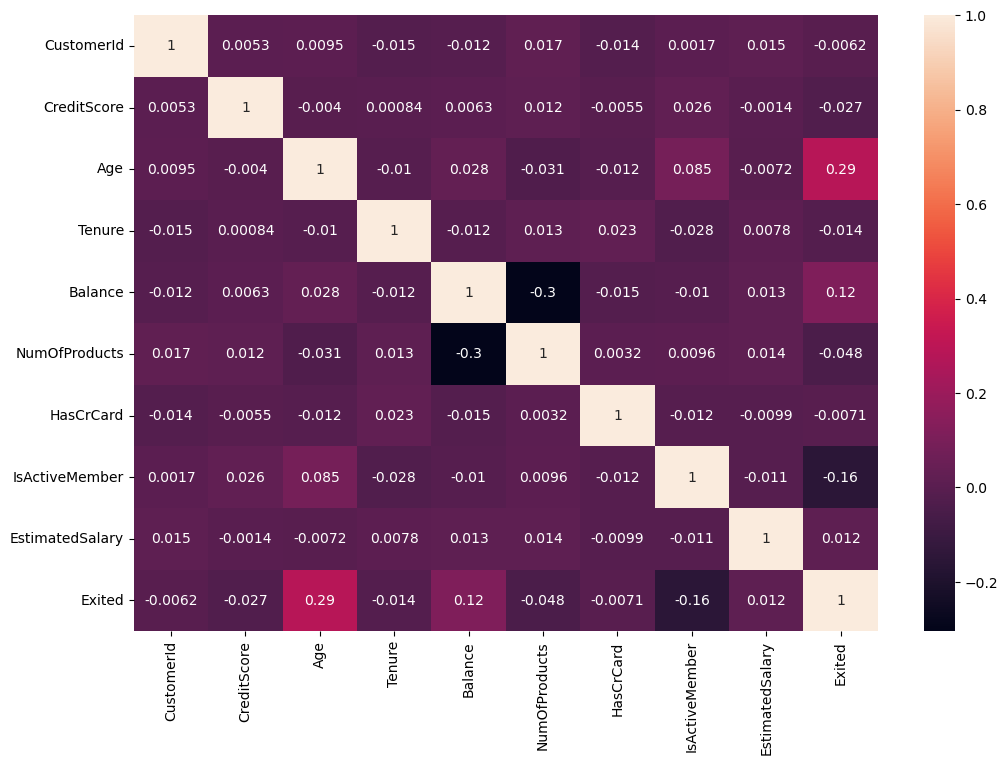

In [14]:
plt.figure(figsize = (12,8))
sn.heatmap(data.corr() , annot = True)

In [16]:
data.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Female,43,2,125510.82,1,1,1,79084.10,0


## Univariant analysis

<Axes: >

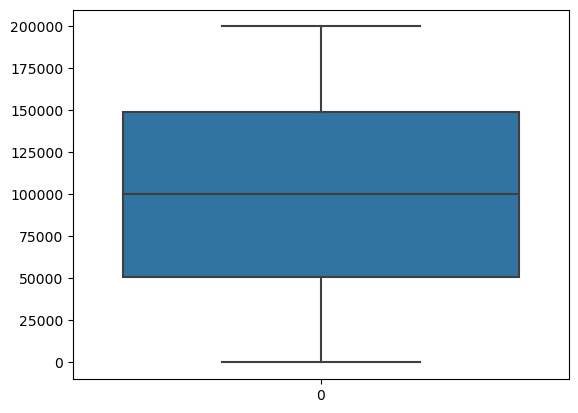

In [17]:
sn.boxplot(data['EstimatedSalary'])

<Axes: >

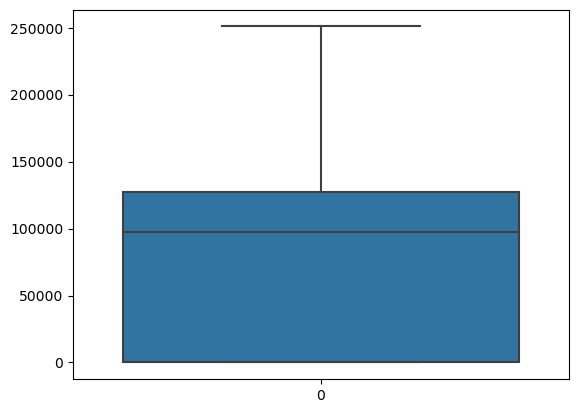

In [18]:
sn.boxplot(data['Balance'])

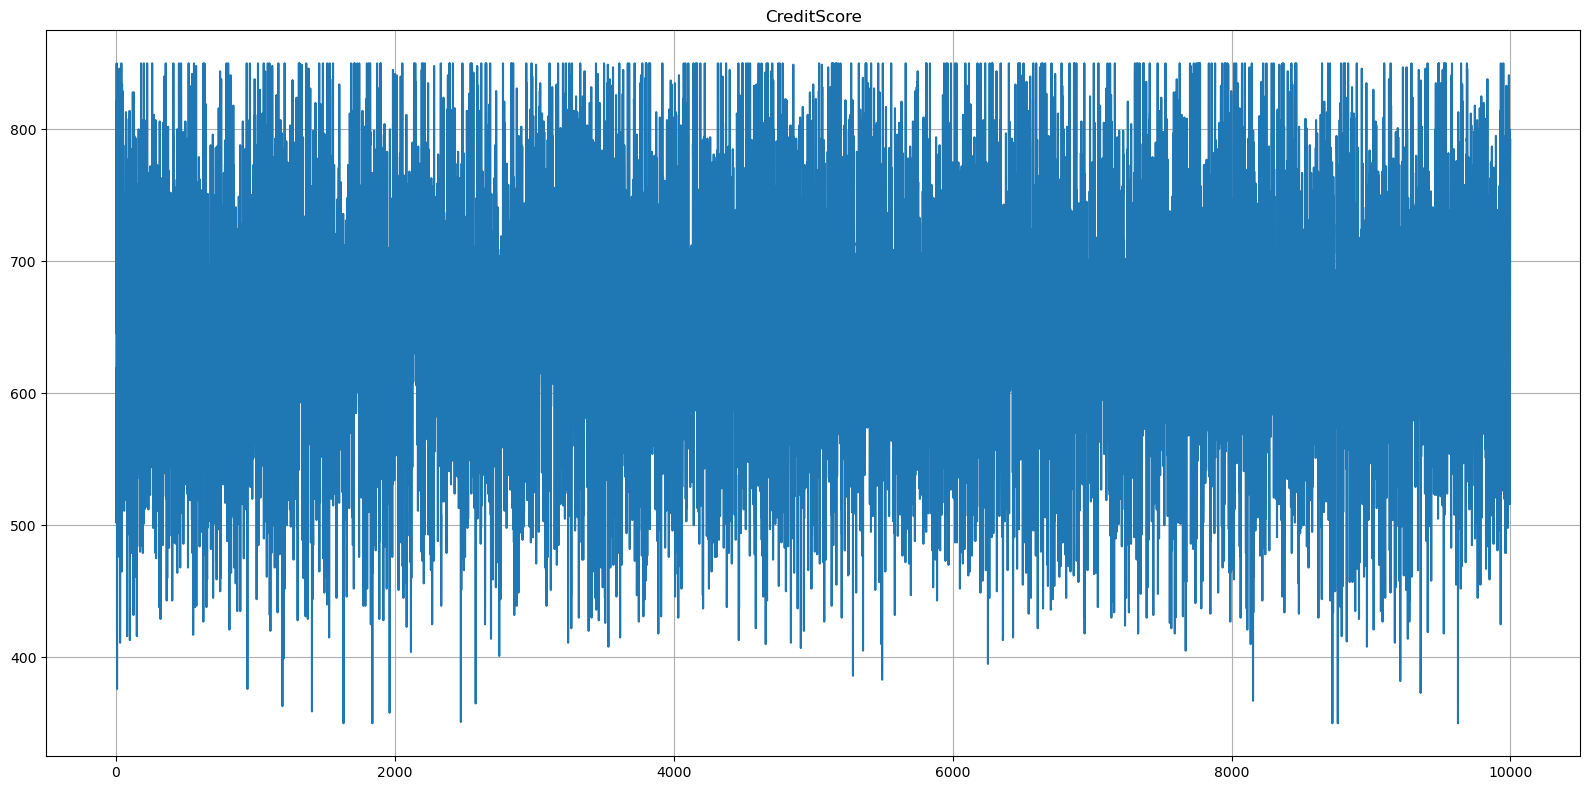

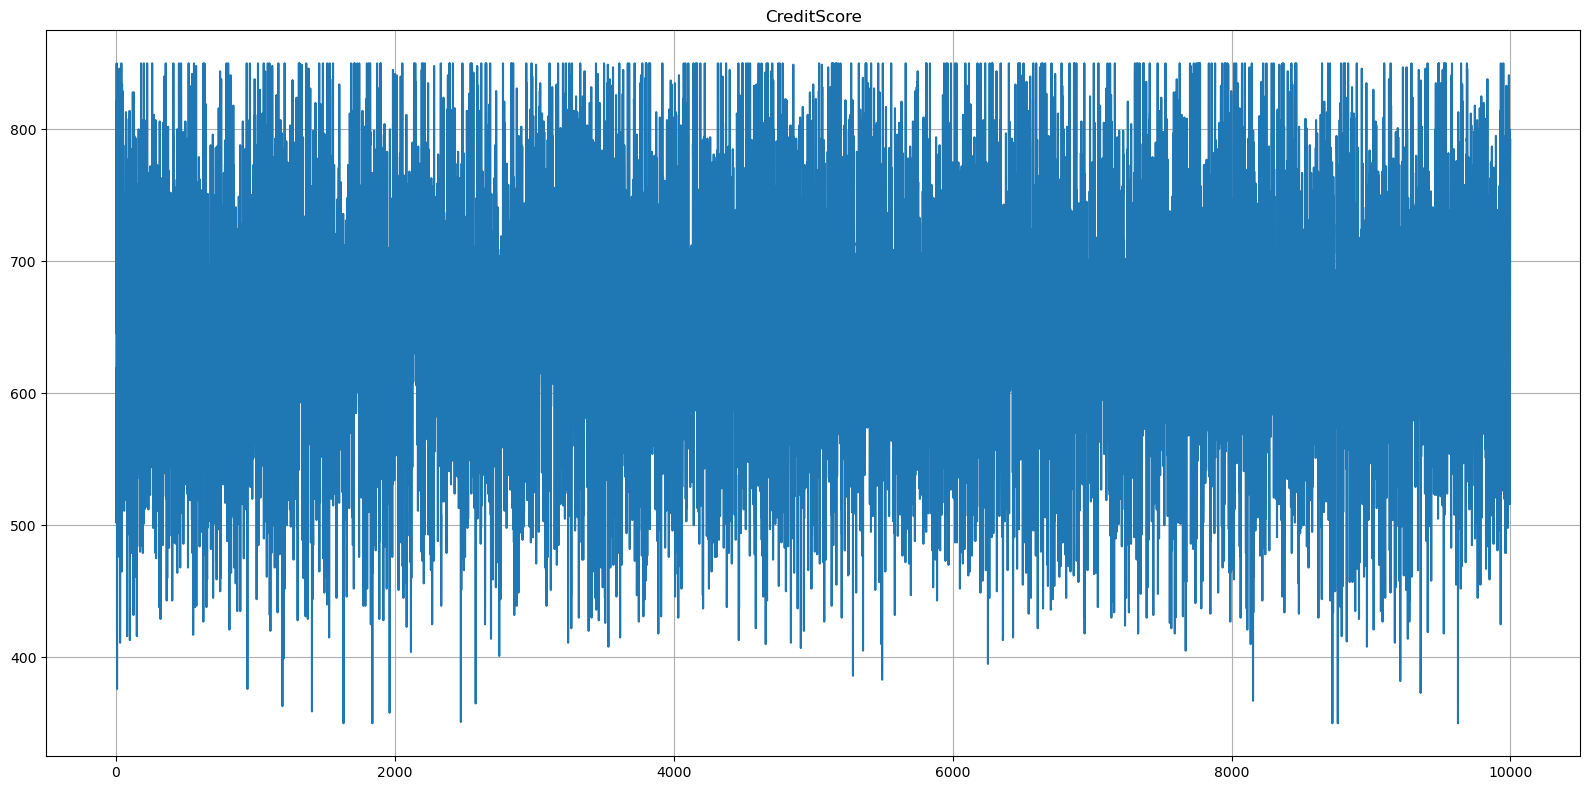

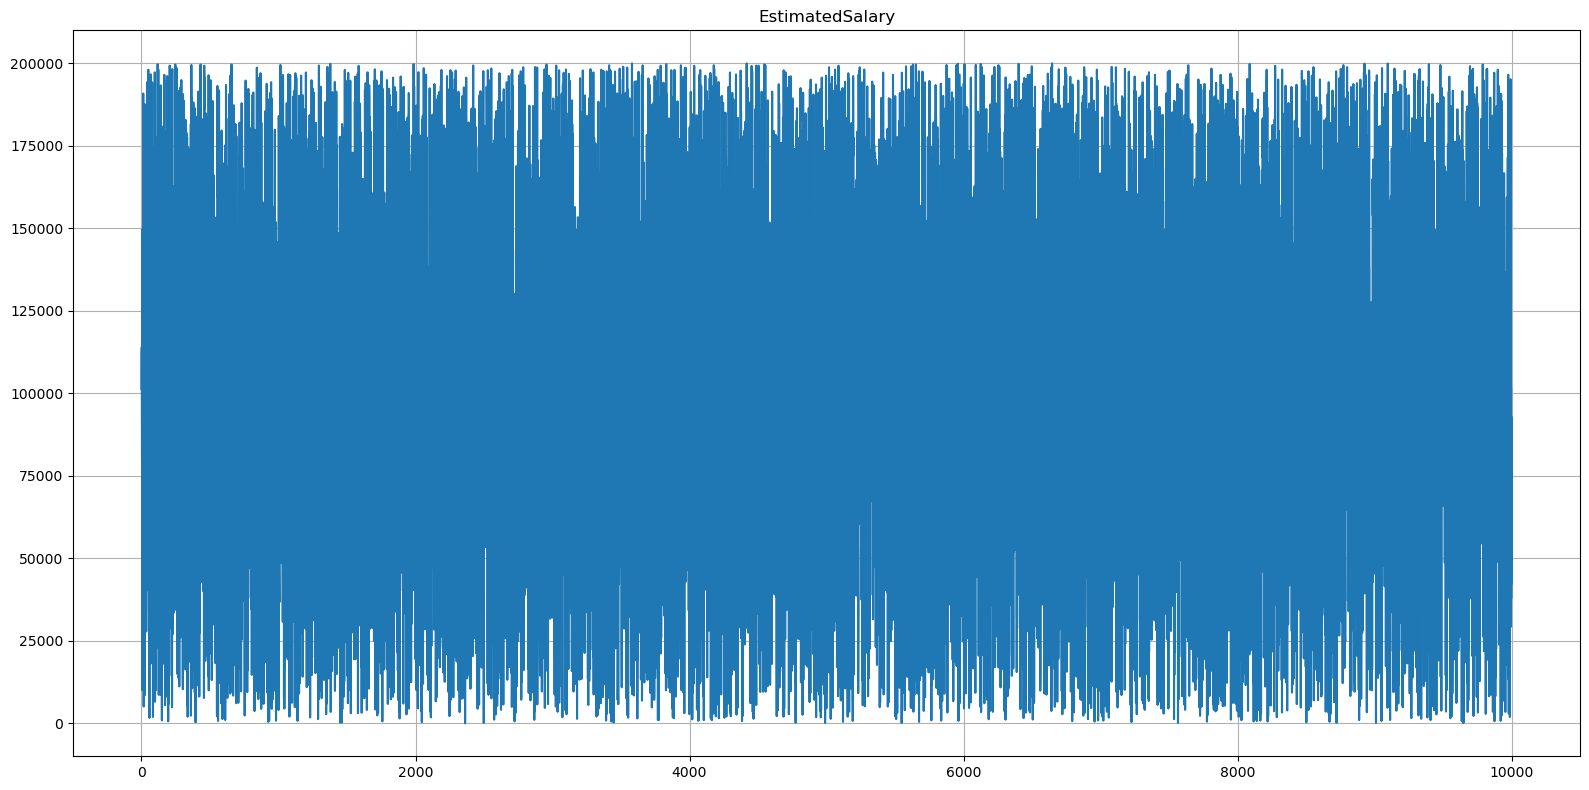

In [20]:
for i in ["CreditScore","CreditScore","EstimatedSalary"]:
    plt.figure(figsize = (16,8))
    data[i].plot(kind = 'line')
    plt.title(i)
    plt.grid()
    plt.tight_layout()
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_15632\1981001264.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data['EstimatedSalary'] , color = 'green')


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

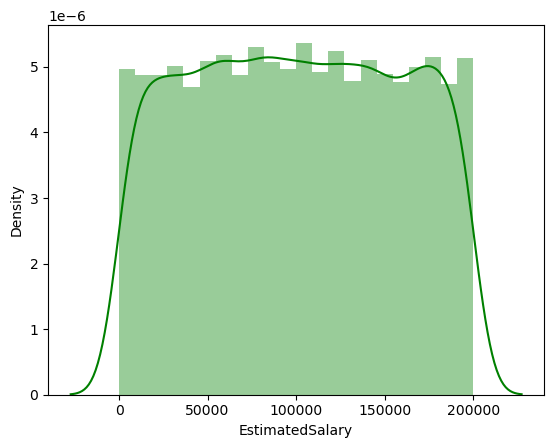

In [24]:
sn.distplot(data['EstimatedSalary'] , color = 'green')

## Bivariant analysis

<Axes: xlabel='CreditScore', ylabel='EstimatedSalary'>

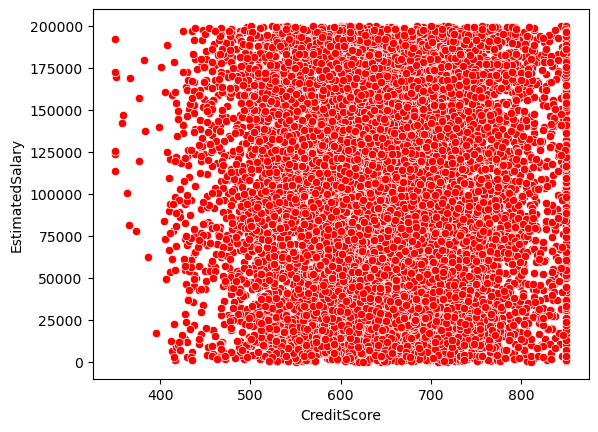

In [21]:
sn.scatterplot(x = "CreditScore" , y = "EstimatedSalary" , data = data , color = 'red')

In [22]:
data.columns

Index(['CustomerId', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

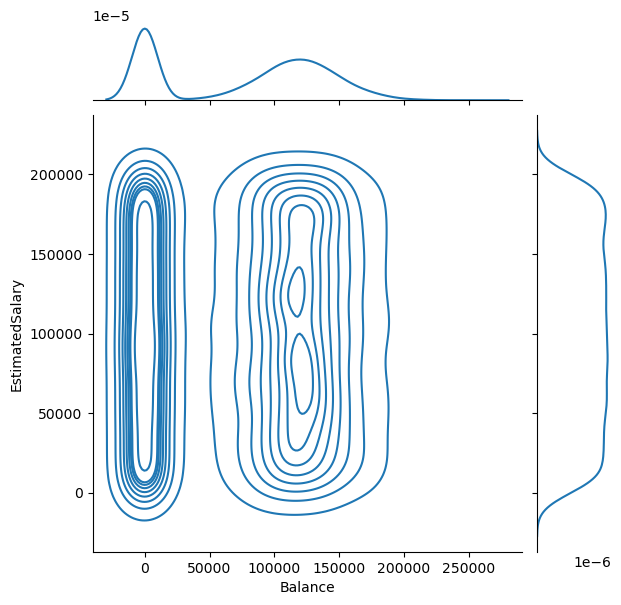

In [23]:
sn.jointplot(x = "Balance" , y = "EstimatedSalary"  , data = data , kind = 'kde' )

## LabelEncoding



In [25]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()

data_encoded = data.apply(le.fit_transform)

In [28]:
data_encoded

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2736,228,0,24,2,0,0,1,1,5068,1
1,3258,217,0,23,1,743,0,0,1,5639,0
2,2104,111,0,24,8,5793,2,1,0,5707,1
3,5435,308,0,21,1,0,1,0,0,4704,0
4,6899,459,0,25,2,3696,0,1,1,3925,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1599,380,1,21,5,0,1,1,0,4827,0
9996,161,125,1,17,10,124,0,1,1,5087,0
9997,717,318,0,18,7,0,0,0,1,2062,1
9998,4656,381,1,24,3,427,1,1,0,4639,1


In [37]:
x = data_encoded.drop(['Exited'] , axis = 1)
y = data_encoded['Exited']

In [38]:
x

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,2736,228,0,24,2,0,0,1,1,5068
1,3258,217,0,23,1,743,0,0,1,5639
2,2104,111,0,24,8,5793,2,1,0,5707
3,5435,308,0,21,1,0,1,0,0,4704
4,6899,459,0,25,2,3696,0,1,1,3925
...,...,...,...,...,...,...,...,...,...,...
9995,1599,380,1,21,5,0,1,1,0,4827
9996,161,125,1,17,10,124,0,1,1,5087
9997,717,318,0,18,7,0,0,0,1,2062
9998,4656,381,1,24,3,427,1,1,0,4639


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [40]:
x_train , x_test , y_train ,y_test = train_test_split(x , y , test_size = 0.20 , random_state = 42) 

In [41]:
x_train.shape , x_test.shape

((8000, 10), (2000, 10))

### Features Scaling

### Features scaling is mandatory for any distance based approach machine learning model but it is mandatory for all deep learning model

In [42]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [45]:
x_train

array([[-1.2453306 ,  0.35650222,  0.91324755, ...,  0.64920267,
         0.97481699,  1.36725785],
       [ 1.05180363, -0.20477537,  0.91324755, ...,  0.64920267,
         0.97481699,  1.65094562],
       [ 0.36921867, -0.96353952,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.25104411],
       ...,
       [-1.62477569,  0.86580965, -1.09499335, ..., -1.54035103,
        -1.02583358, -0.14124066],
       [ 1.62790811,  0.15901566,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.04910275],
       [ 0.22215769,  0.47083654,  0.91324755, ...,  0.64920267,
         0.97481699, -0.82707925]])

In [46]:
x_test

array([[-0.04178904, -0.57896043,  0.91324755, ..., -1.54035103,
        -1.02583358, -1.03040615],
       [ 0.64773276, -0.29832164,  0.91324755, ...,  0.64920267,
         0.97481699,  0.8099274 ],
       [ 0.43338443, -0.52699028, -1.09499335, ...,  0.64920267,
        -1.02583358, -0.73632687],
       ...,
       [ 0.77502375,  0.81383951, -1.09499335, ...,  0.64920267,
        -1.02583358, -1.17138408],
       [-0.0216722 ,  0.41886639,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.42042546],
       [-0.54679091, -0.24635149,  0.91324755, ...,  0.64920267,
         0.97481699,  0.13344115]])

In [47]:
x_train.shape

(8000, 10)

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

## ANN Sequential model

In [48]:
model = Sequential()
model.add(Dense(11 , input_dim = 10 , activation = 'relu')) ## Input layers
model.add(Dense(18 , activation = 'relu')) ## 1 hidden layer
model.add(Dense(18 , activation = 'relu')) ## 2 hidden layer
model.add(Dense(9 , activation = 'relu')) ## 3 hidden layer
model.add(Dense(1 , activation = 'sigmoid')) ## output layer

In [51]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])  ## model compile

In [52]:
history = model.fit(x_train , y_train , batch_size = 200 , epochs = 400)

Epoch 1/400
40/40 [==============================] - 2s 3ms/step - loss: 0.5961 - accuracy: 0.7739
Epoch 2/400
40/40 [==============================] - 0s 3ms/step - loss: 0.5157 - accuracy: 0.7945
Epoch 3/400
40/40 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.7945
Epoch 4/400
40/40 [==============================] - 0s 2ms/step - loss: 0.4623 - accuracy: 0.7943
Epoch 5/400
40/40 [==============================] - 0s 2ms/step - loss: 0.4472 - accuracy: 0.7954
Epoch 6/400
40/40 [==============================] - 0s 3ms/step - loss: 0.4354 - accuracy: 0.7999
Epoch 7/400
40/40 [==============================] - 0s 2ms/step - loss: 0.4258 - accuracy: 0.8050
Epoch 8/400
40/40 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8111
Epoch 9/400
40/40 [==============================] - 0s 3ms/step - loss: 0.4062 - accuracy: 0.8184
Epoch 10/400
40/40 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8257
Epoch 11/

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                121       
                                                                 
 dense_1 (Dense)             (None, 18)                216       
                                                                 
 dense_2 (Dense)             (None, 18)                342       
                                                                 
 dense_3 (Dense)             (None, 9)                 171       
                                                                 
 dense_4 (Dense)             (None, 1)                 10        
                                                                 
Total params: 860 (3.36 KB)
Trainable params: 860 (3.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
y_pred = model.predict(x_train)

250/250 [==============================] - 1s 2ms/step


In [59]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [61]:
y_pred

array([[0.00090193],
       [0.00250193],
       [0.12050421],
       ...,
       [0.7695316 ],
       [0.36808318],
       [0.22497138]], dtype=float32)

In [62]:
y_pred_test = model.predict(x_test)

63/63 [==============================] - 0s 2ms/step


In [63]:
y_pred_test

array([[0.00358465],
       [0.00244938],
       [0.09396023],
       ...,
       [0.5266929 ],
       [0.08168512],
       [0.2167488 ]], dtype=float32)

In [64]:
import sklearn.metrics as metrics

In [68]:
print("accuracy_test:" , metrics.roc_auc_score(y_test , y_pred_test))

accuracy_test: 0.8149080596816408


In [69]:
print("accuracy_train:" , metrics.roc_auc_score(y_train , y_pred))

accuracy_train: 0.8970471987309344


In [71]:
data_encoded.head()

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2736,228,0,24,2,0,0,1,1,5068,1
1,3258,217,0,23,1,743,0,0,1,5639,0
2,2104,111,0,24,8,5793,2,1,0,5707,1
3,5435,308,0,21,1,0,1,0,0,4704,0
4,6899,459,0,25,2,3696,0,1,1,3925,0


## Make prediction on the some random input values

In [75]:

num = np.array([[2354 , 453 , 0 , 27 , 2, 436 , 0 , 1 , 1  , 5463 ]])

In [76]:
model.predict(num)

1/1 [==============================] - 0s 118ms/step


array([[0.]], dtype=float32)